In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data=pd.read_csv("AmazonReview.csv")
data

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1
...,...,...
24995,These cables (lightning) are far superior to m...,5
24996,This unit performs exactly as advertised. I u...,5
24997,I had the key cut at a local hardware store cu...,5
24998,I love my case I ordered from amazon. It wasn'...,5


In [7]:
data.describe()

,Sentiment
count,25000.000000
mean,3.000000
std,1.414242
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [11]:
data.isnull().sum()

Review       1
Sentiment    0
dtype: int64

In [13]:
data=data.dropna()

In [15]:
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [17]:
data['Sentiment']=data['Sentiment'].apply(lambda x: 0 if x<=3 else 1)
#or data['Sentiment'] = np.where(data['Sentiment'] <= 3, 0, 1)
#or
#data.loc[data['Sentiment']<=3,'Sentiment'] = 0
#data.loc[data['Sentiment']>3,'Sentiment'] = 1

In [19]:
data

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it's not e...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0
...,...,...
24995,These cables (lightning) are far superior to m...,1
24996,This unit performs exactly as advertised. I u...,1
24997,I had the key cut at a local hardware store cu...,1
24998,I love my case I ordered from amazon. It wasn'...,1


In [21]:
data['Sentiment'].value_counts()

0    15000
1     9999
Name: Sentiment, dtype: int64

In [25]:
data.reset_index(drop=True, inplace=True)

In [27]:
import re
stopword=stopwords.words('english')
corpus=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if word not in stopword]
    review=' '.join(review)
    corpus.append(review)
corpus

['fast shipping product cheaply made brought grandchild ipod would protected fell skin suitable protection good decoration therefore rated',
 'case takes long ship even worth dont buy',
 'good droids good iphones cannot use features watch iphone synch iphone',
 'cable compatible macbook iphone also connector came apart cables started fraying',
 'case nice glow light disappointed product meet advertisement',
 'cable keeps coming message accessory supported bought specifically led believe totally compatible iphone able charge iphone either cables ii throw trash waste money',
 'pos broke phone uses luckily able pull remnants tweezers stay away',
 'product suck hard hear wat saying',
 'music cuts within secs like aukey product one really disappointed aukey needs go back drawing board',
 'yeah say mirror screen mean ipod becomes like mirror nearly impossible see actual screen direct sunlight',
 'power ac adapter tried several outlets confirmed usb cable worked wall adapter returning may she

In [29]:
data['Review']=corpus

In [31]:
data

,Review,Sentiment
0,fast shipping product cheaply made brought gra...,0
1,case takes long ship even worth dont buy,0
2,good droids good iphones cannot use features w...,0
3,cable compatible macbook iphone also connector...,0
4,case nice glow light disappointed product meet...,0
...,...,...
24994,cables lightning far superior cables market ev...,1
24995,unit performs exactly advertised use climbing ...,1
24996,key cut local hardware store cut free programm...,1
24997,love case ordered amazon color looked online f...,1


In [33]:
data['Sentiment'].value_counts()

0    15000
1     9999
Name: Sentiment, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(data['Review'],data['Sentiment'],test_size=0.25 ,random_state=42)

In [37]:
tfidf=TfidfVectorizer(max_features=2500)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [39]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred=lr.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred)

0.81072

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3718
           1       0.81      0.70      0.75      2532

    accuracy                           0.81      6250
   macro avg       0.81      0.79      0.80      6250
weighted avg       0.81      0.81      0.81      6250



In [49]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3300,  418],
       [ 765, 1767]], dtype=int64)

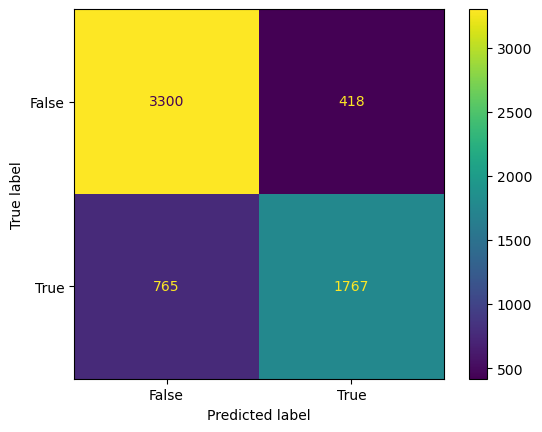

In [51]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
plt.show()